In [ ]:
# Mayank Kumar
# 240637
# Electrical Engineering


# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        pass

    def transform(self, X):
        pass

    def fit_transform(self, X):
        pass


In [ ]:
class StandardScalerManual:
    """
    Manually implemented version of sklearn's StandardScaler
    """

    def fit(self, X):
        """
        Compute mean and std for each feature
        """
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

        # Avoid division by zero
        self.std_[self.std_ == 0] = 1

    def transform(self, X):
        """
        Standardize using stored mean and std
        """
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        """
        Fit and Transform
        """
        self.fit(X)
        return self.transform(X)

In [ ]:
"""
StandardScaler is used to standardize features so that each feature
has a mean of 0 and a standard deviation of 1, which helps gradient
descent converge faster and more reliably.

The mean represents the average value of a feature and indicates
the central tendency of the data.

The standard deviation measures how spread out the values of a
feature are from the mean.

During the fit() step, the mean and standard deviation of each
feature are calculated using the training data and stored.

The transform() step applies the standardization formula:
(X − mean) / standard deviation, using the stored values.

The fit_transform() method combines both steps for convenience.

If a feature has zero standard deviation, it is replaced with 1
to avoid division by zero errors.
"""

'\nStandardScaler is used to standardize features so that each feature\nhas a mean of 0 and a standard deviation of 1, which helps gradient\ndescent converge faster and more reliably.\n\nThe mean represents the average value of a feature and indicates\nthe central tendency of the data.\n\nThe standard deviation measures how spread out the values of a\nfeature are from the mean.\n\nDuring the fit() step, the mean and standard deviation of each\nfeature are calculated using the training data and stored.\n\nThe transform() step applies the standardization formula:\n(X − mean) / standard deviation, using the stored values.\n\nThe fit_transform() method combines both steps for convenience.\n\nIf a feature has zero standard deviation, it is replaced with 1\nto avoid division by zero errors.\n'

In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass


In [ ]:
class LinearRegressionManual:
    """
    Linear Regression with Gradient Descent and L2 Regularization
    """

    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        """
        Initialization method

        lr: Learning rate, controls how big a step we take in the direction
            of the negative gradient.
        epochs: Number of iterations for gradient descent.
        l2_lambda: Strength of L2 regularization. Penalizes large weights
                   to prevent overfitting and improve stability.
        """
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):

        n_samples, n_features = X.shape

        # Initialize weights and bias to zero
        self.w = np.zeros(n_features)
        self.b = 0

        # List to store loss at each iteration for plotting
        self.losses = []

        for _ in range(self.epochs):
            # Compute predictions: y_pred = Xw + b
            y_pred = X @ self.w + self.b
            """
            X @ self.w performs matrix multiplication:
            Each predicted y_hat = sum(feature_i * weight_i) + bias
            """

            # Compute Mean Squared Error (MSE)
            mse = np.mean((y - y_pred) ** 2)
            """
            MSE measures how far predictions are from actual values.
            Squaring ensures positive error and penalizes larger deviations more.
            """

            # Compute L2 regularization term
            l2_term = self.l2_lambda * np.sum(self.w ** 2)
            """
            L2 regularization penalizes large weights to prevent overfitting.
            The higher lambda is, the more weight shrinkage occurs.
            """

            # Total loss = MSE + L2 penalty
            loss = mse + l2_term
            self.losses.append(loss)

            # Compute gradient w.r.t weights (dw)
            dw = (-2 / n_samples) * (X.T @ (y - y_pred)) + 2 * self.l2_lambda * self.w
            """
            (-2/n) * X.T @ (y - y_pred):
                Gradient of MSE part, points in direction to reduce prediction error
            2 * lambda * w:
                Gradient of L2 part, penalizes large weights
            Total dw guides weight update to reduce both error and weight magnitude
            """

            # Compute gradient w.r.t bias (db)
            db = (-2 / n_samples) * np.sum(y - y_pred)
            """
            Bias gradient only comes from prediction error; not regularized.
            """

            # Update weights and bias using gradient descent
            self.w -= self.lr * dw
            self.b -= self.lr * db
            """
            Subtracting lr * gradient moves parameters in direction of decreasing loss.
            Learning rate controls step size. Too high can diverge, too low converges slowly.
            """

    def predict(self, X):
        """
        Generate predictions for input features X

        Formula:
        y_pred = X @ w + b
        After training, learned weights w and bias b give the best linear
        approximation to target y. Matrix multiplication efficiently computes
        predicted values for all samples.
        """
        return X @ self.w + self.b

In [ ]:
"""
LinearRegressionManual implements linear regression with gradient descent
and optional L2 regularization (Ridge). The reasoning behind each part is:


__Initialization (w=0, b=0)__
- We start with zero weights for simplicity.
- Linear regression loss is convex, so gradient descent will converge
  to the global minimum regardless of initial weights.


__Gradient Descent__
- We update weights iteratively to reduce the loss.
- The gradient points in the direction of steepest increase,
  so subtracting the gradient moves us toward minimum loss.
- Learning rate (lr) controls step size:
    - Too small → slow convergence
    - Too large → may overshoot minimum


__Loss Function (MSE + L2 Regularization)__
- MSE measures how well predictions match true values.
- L2 term penalizes large weights:
    - Prevents overfitting
    - Keeps the model more stable and generalizable


__Gradients__
- dw = derivative of loss w.r.t weights:
    - Includes both prediction error and L2 penalty
    - Guides weights to reduce both error and complexity
- db = derivative w.r.t bias:
    - Bias is not regularized because it shifts all predictions equally


__Weight Update__
- w -= lr * dw and b -= lr * db
- Reasoning: move weights opposite to gradient to minimize loss


__Storing Loss__
- We record loss at each iteration to:
    - Monitor convergence
    - Detect issues like too high learning rate or divergence


__Predict Method__
- Computes y_pred = X @ w + b
- Reasoning: After training, these learned weights and bias
  give the best linear approximation to target values
"""

In [ ]:
# Load training data
train_data = np.genfromtxt(
    "sample_data/california_housing_train.csv",
    delimiter=",",
    skip_header=1
)

# Load testing data
test_data = np.genfromtxt(
    "sample_data/california_housing_test.csv",
    delimiter=",",
    skip_header=1
)

# Split features and target
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

In [ ]:
scaler = StandardScalerManual()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegressionManual(lr=0.01, epochs=2000, l2_lambda=0.1)
model.fit(X_train_scaled, y_train)

y_test_pred = model.predict(X_test_scaled)

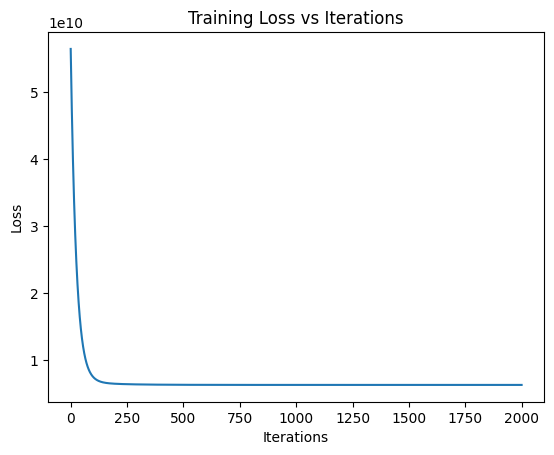

In [ ]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.show()

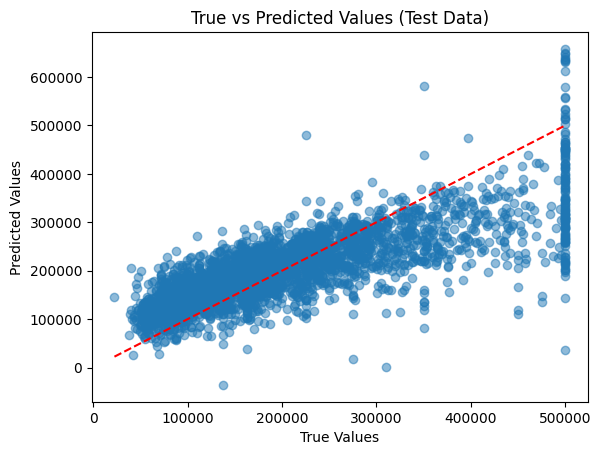

In [ ]:
plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Test Data)")
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    pass


In [ ]:
# Implement sigmoid function as told in the lectures
def sigmoid(z):
    """
    The sigmoid function is defined as:

        σ(z) = 1 / (1 + e^(−z))

    This function is used in logistic regression to map the linear
    combination z = Xw + b to a value between 0 and 1.

    In probability terms:
        σ(z) = P(y = 1 | x)

    The exponential term e^(−z) ensures the output is bounded,
    allowing the model to use Binary Cross Entropy loss.

    The derivative of sigmoid, used during gradient descent, is:
        σ'(z) = σ(z) · (1 − σ(z))
    """
    return 1 / (1 + np.exp(-z))

In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass

    def fit(self, X, y):
        pass

    def predict_proba(self, X):
        pass

    def predict(self, X):
        pass


In [ ]:
class LogisticRegressionManual:
    """
    Logistic Regression for binary classification implemented from scratch
    using Gradient Descent with L2 Regularization.
    """

    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        """
        lr        : learning rate
        epochs    : number of gradient descent iterations
        l2_lambda : regularization parameter (λ)
        """
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        """
        Model definition:

        z = Xw + b
        ŷ = σ(z)

        Loss Function (Binary Cross Entropy with L2 Regularization):

        L(w, b) = −(1/n) Σ [ y log(ŷ) + (1 − y) log(1 − ŷ) ] + λ Σ w²

        Optimization:

        Minimize L(w, b) using gradient descent.
        """
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0

        # Store loss values
        self.losses = []

        for _ in range(self.epochs):

            # Linear predictor
            z = X @ self.w + self.b

            # Predicted probabilities
            y_hat = sigmoid(z)

            # Binary Cross Entropy loss
            bce_loss = -np.mean(
                y * np.log(y_hat + 1e-9) +
                (1 - y) * np.log(1 - y_hat + 1e-9)
            )

            # L2 regularization term
            l2_term = self.l2_lambda * np.sum(self.w ** 2)

            # Total loss
            loss = bce_loss + l2_term
            self.losses.append(loss)

            """
            Gradient derivation:

            ∂L/∂w = (1/n) Xᵀ (ŷ − y) + 2λw
            ∂L/∂b = (1/n) Σ (ŷ − y)

            These gradients are obtained by differentiating
            the Binary Cross Entropy loss with respect to
            weights and bias.
            """
            dw = (1 / n_samples) * (X.T @ (y_hat - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n_samples) * np.sum(y_hat - y)

            # Gradient descent update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        """
        Probability prediction:

            P(y = 1 | x) = σ(Xw + b)
        """
        z = X @ self.w + self.b
        return sigmoid(z)

    def predict(self, X):
        """
        Class prediction rule:

            y = 1 if P(y = 1 | x) ≥ 0.5
            y = 0 otherwise
        """
        return (self.predict_proba(X) >= 0.5).astype(int)

In [ ]:
"""

Logistic Regression is a supervised learning algorithm used for
binary classification problems where the target variable y ∈ {0, 1}.

The model first computes a linear predictor:
    z = Xw + b
where X is the feature matrix, w is the weight vector, and b is the bias.

Since z can take any real value, it is passed through the sigmoid function:
    σ(z) = 1 / (1 + e^(−z))
This maps the linear output to the interval (0, 1), allowing it to be
interpreted as a probability:
    P(y = 1 | x)

To train the model, Binary Cross Entropy loss is used:
    L = −(1/n) Σ [ y log(ŷ) + (1 − y) log(1 − ŷ) ]

L2 regularization is added to the loss:
    λ Σ w²
This penalizes large weight values, reducing model complexity and
helping prevent overfitting.

The total loss is minimized using gradient descent. The gradients are:
    ∂L/∂w = (1/n) Xᵀ (ŷ − y) + 2λw
    ∂L/∂b = (1/n) Σ (ŷ − y)

Weights and bias are updated iteratively in the direction of the
negative gradient to minimize the loss.

After training, predicted probabilities are converted to class labels
using a threshold of 0.5.

"""

In [ ]:
# Load train data
train_data = np.genfromtxt(
    "sample_data/mnist_train_small.csv",
    delimiter=","
)

# Load test data
test_data = np.genfromtxt(
    "sample_data/mnist_test.csv",
    delimiter=","
)

# Split features and labels
y_train = train_data[:, 0]
X_train = train_data[:, 1:]

y_test = test_data[:, 0]
X_test = test_data[:, 1:]

In [ ]:
y_train = (y_train == 0).astype(int)
y_test = (y_test == 0).astype(int)

In [ ]:
scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_train_scaled, y_train)

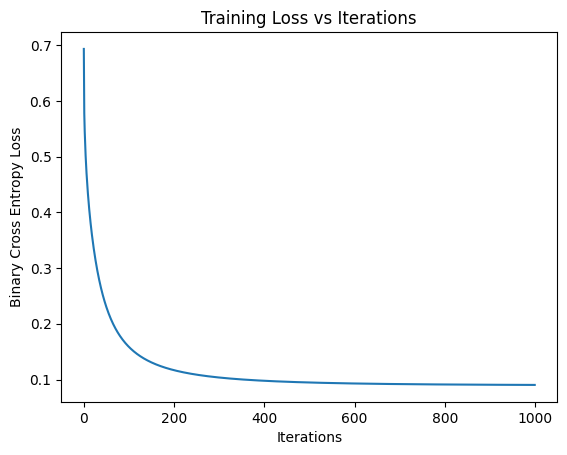

In [ ]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss vs Iterations")
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)

print("Final Test Accuracy:", accuracy)

Final Test Accuracy: 0.9843



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    pass


In [2]:
import numpy as np

def kmeans_matrix(M, k, max_iters=100):
    '''
    M : matrix of shape (n, m)
    k : number of clusters
    max_iters : maximum number of iterations for convergence
    '''

    # n = number of rows, m = number of columns in matrix M
    n, m = M.shape

    # Flatten matrix M into a 1D vector of length n*m
    # This converts M ∈ R^(n×m) → v ∈ R^(n·m)
    # Each element is treated as an independent 1D data point
    values = M.flatten()

    # Randomly initialize k centroids from the data points
    # Each centroid c_i ∈ R (since clustering scalar values)
    # replace=False ensures all centroids are distinct
    centroids = np.random.choice(values, k, replace=False)

    # Initialize cluster labels for each data point
    # labels[p] stores which cluster the p-th value belongs to
    # labels[p] ∈ {0, 1, ..., k-1}
    labels = np.zeros(len(values), dtype=int)

    # Repeat assignment and update steps until convergence or max_iters
    for _ in range(max_iters):

        # For each data point v_p, assign it to the closest centroid
        for idx, val in enumerate(values):

            # Compute distance between val and each centroid
            # Since data is 1D, Euclidean distance reduces to absolute difference
            # distance_i = |val - c_i|
            distances = np.abs(val - centroids)

            # Assign val to the cluster with minimum distance
            # This solves: argmin_i |val - c_i|
            labels[idx] = np.argmin(distances)

        # Compute new centroids as the mean of assigned points
        new_centroids = np.array([
            # Mean of all values assigned to cluster i
            # c_i = (1 / |C_i|) * Σ v_p  where v_p ∈ cluster i
            values[labels == i].mean()
            if np.any(labels == i)        # Ensure cluster is not empty
            else centroids[i]             # If empty, keep old centroid
            for i in range(k)
        ])

        # If centroids do not change, algorithm has converged
        # np.allclose checks if difference is numerically negligible
        if np.allclose(centroids, new_centroids):
            break

        # Update centroids for next iteration
        centroids = new_centroids

    # Reshape labels back to matrix form
    # This maps each scalar's cluster label back to its original (i, j) position
    assignment_table = labels.reshape(n, m)

    # Initialize cookbook dictionary
    # Key: cluster index
    # Value: list of (i, j) indices belonging to that cluster
    cookbook = {i: [] for i in range(k)}

    # Populate cookbook by iterating over matrix positions
    for i in range(n):
        for j in range(m):
            # Get cluster id assigned to M[i, j]
            cluster_id = assignment_table[i, j]

            # Append matrix position to corresponding cluster list
            cookbook[cluster_id].append((i, j))

    # Return all required outputs
    return assignment_table, cookbook, centroids

In [ ]:
"""
K-Means Clustering is an unsupervised learning algorithm that partitions
data into k clusters by minimizing intra-cluster variance.

For a matrix M ∈ ℝ^(n×m), each element M[i, j] is treated as an individual
1D data point. The algorithm proceeds as follows:

1. Flatten the matrix:
    v = flatten(M)  # v ∈ ℝ^(n*m)
   This simplifies clustering by treating each scalar independently.

2. Initialize k centroids randomly from the data:
    C = {c_1, ..., c_k},  c_i ∈ ℝ
   Random initialization provides diverse starting points for cluster optimization.

3. Iterative Assignment and Update:
   - Assignment: each element v_p is assigned to the nearest centroid
       label_p = argmin_i |v_p - c_i|
   - Update: each centroid is updated as the mean of its assigned points
       c_i = mean({v_p | v_p ∈ cluster i})
     If a cluster receives no points, its previous centroid is retained.
   The process repeats until centroids stabilize:
       ||C_new - C_old|| ≈ 0 or maximum iterations reached.

4. Postprocessing:
   - Reshape labels back to matrix form:
       assignment_table[i, j] = label of M[i, j]
   - Create a cookbook mapping each cluster index to the list of positions
     (i, j) it contains.

The algorithm minimizes the objective function:
    min_{C, labels} Σ_{i=1}^k Σ_{v_p ∈ cluster i} (v_p - c_i)^2

Outputs:
    - assignment_table ∈ {0, ..., k-1}^(n×m)
    - cookbook: dictionary mapping cluster index → list of matrix positions
    - centroids: array of final centroid values c_i ∈ ℝ
"""

'\nK-Means Clustering is an unsupervised learning algorithm that partitions\ndata into k clusters by minimizing intra-cluster variance.\n\nFor a matrix M ∈ ℝ^(n×m), each element M[i, j] is treated as an individual\n1D data point. The algorithm proceeds as follows:\n\n1. Flatten the matrix:\n    v = flatten(M)  # v ∈ ℝ^(n*m)\n   This simplifies clustering by treating each scalar independently.\n\n2. Initialize k centroids randomly from the data:\n    C = {c_1, ..., c_k},  c_i ∈ ℝ\n   Random initialization provides diverse starting points for cluster optimization.\n\n3. Iterative Assignment and Update:\n   - Assignment: each element v_p is assigned to the nearest centroid\n       label_p = argmin_i |v_p - c_i|\n   - Update: each centroid is updated as the mean of its assigned points\n       c_i = mean({v_p | v_p ∈ cluster i})\n     If a cluster receives no points, its previous centroid is retained.\n   The process repeats until centroids stabilize:\n       ||C_new - C_old|| ≈ 0 or maximu

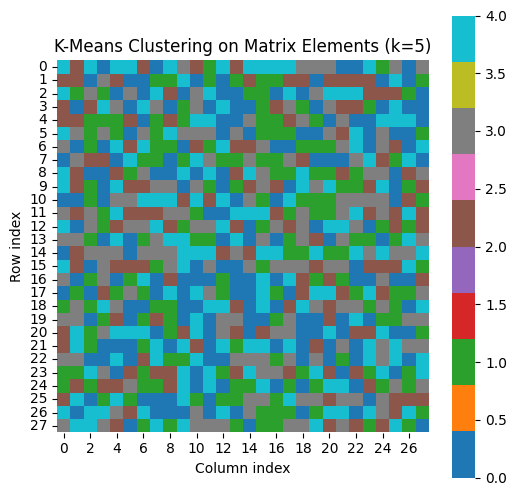

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Generate a random 28x28 matrix
np.random.seed(42)
M = np.random.randint(0, 256, size=(28, 28))

# Step 2: Choose number of clusters
k = 5

# Step 3: Use your kmeans_matrix function
assignment_table, cookbook, centroids = kmeans_matrix(M, k)

plt.figure(figsize=(6,6))
sns.heatmap(
    assignment_table,
    cmap="tab10",
    square=True,
    cbar=True
)
plt.title(f"K-Means Clustering on Matrix Elements (k={k})")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
